# **Contexto**

Dataset - 270 imagens do Homer e Bart, as imagens já estão com os nomes, facilitando o tratamento e treinamento da rede neural.

https://www.kaggle.com/juniorbueno/neural-networks-homer-and-bart-classification



## Importando as Libraries

In [24]:
import cv2           
import numpy as np
import os
import zipfile
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Extraindo as imagens

In [25]:
path = './homer_bart_1/'
directory = './homer_bart_1/'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['./homer_bart_1/bart1.bmp', './homer_bart_1/bart10.bmp', './homer_bart_1/bart100.bmp', './homer_bart_1/bart101.bmp', './homer_bart_1/bart102.bmp', './homer_bart_1/bart103.bmp', './homer_bart_1/bart104.bmp', './homer_bart_1/bart105.bmp', './homer_bart_1/bart106.bmp', './homer_bart_1/bart108.bmp', './homer_bart_1/bart109.bmp', './homer_bart_1/bart11.bmp', './homer_bart_1/bart110.bmp', './homer_bart_1/bart111.bmp', './homer_bart_1/bart112.bmp', './homer_bart_1/bart113.bmp', './homer_bart_1/bart114.bmp', './homer_bart_1/bart115.bmp', './homer_bart_1/bart116.bmp', './homer_bart_1/bart117.bmp', './homer_bart_1/bart118.bmp', './homer_bart_1/bart119.bmp', './homer_bart_1/bart12.bmp', './homer_bart_1/bart120.bmp', './homer_bart_1/bart121.bmp', './homer_bart_1/bart122.bmp', './homer_bart_1/bart123.bmp', './homer_bart_1/bart124.bmp', './homer_bart_1/bart125.bmp', './homer_bart_1/bart126.bmp', './homer_bart_1/bart127.bmp', './homer_bart_1/bart128.bmp', './homer_bart_1/bart13.bmp', './homer_bart_1

In [26]:
width, height = 128, 128  
images = []
classes = []  

for path_image in files:
  
  try:                             
    image = cv2.imread(path_image)
    (H, W) = image.shape[:2]        
  except:
    continue

  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   


  window_name = 'image'
  # cv2.imshow(window_name, image)  
  # cv2.waitKey(0)
  # cv2.destroyAllWindows() 
  
  image = image.ravel()

  images.append(image)    
  name_image = os.path.basename(os.path.normpath(path_image))  
  #print(nome_imagem)
  if name_image.startswith('b'):                             
    classe = 0
  else:
    classe = 1

  classes.append(classe)
  # print(classe)

In [27]:
images

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 128, 123, 124], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 2

In [28]:
images[100], classes[100]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0)

In [29]:
images[200], classes[200]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 1)

In [31]:
type(images), type(classes)

(list, list)

In [33]:
X = np.asarray(images)   
Y = np.asarray(classes)

In [34]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [11]:
X.shape

(269, 16384)

In [35]:
Y.shape

(269,)

<Axes: ylabel='count'>

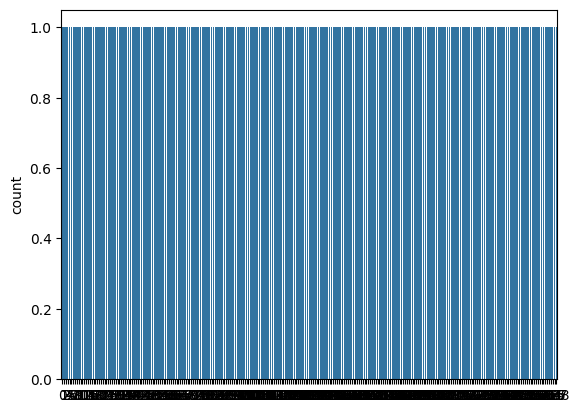

In [36]:
sns.countplot(Y)

In [37]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([160, 109], dtype=int64))

## Normalizaçao - Hexadecimal (255) para escala de 0 a 1

In [42]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [44]:
X[0].max(), X[0].min()   

(1.0, 0.0)

In [45]:
X[1]

array([0.9947644 , 0.99479167, 0.99479167, ..., 0.99559471, 0.99595142,
       0.9950495 ])

## Treinamento e Teste 20% split

In [46]:
X.shape

(269, 16384)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)  

In [48]:
X_train.shape, y_train.shape

((215, 16384), (215,))

In [49]:
X_test.shape, y_test.shape

((54, 16384), (54,))

## Construçao da topologia e treinamento da rede neural

In [50]:
128 * 128

16384

In [1]:
(16384 + 2) / 2

8193.0

In [52]:
# 16384 -> 8193 -> 8193
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units = 8193, activation='relu')) 
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units = 8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [53]:
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128, 16384)        2113536   
                                                                 
 dense_1 (Dense)             (None, 128, 1)            16385     
                                                                 
Total params: 2129921 (8.13 MB)
Trainable params: 2129921 (8.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
historic = network1.fit(X_train, y_train, epochs = 50)

Epoch 1/50


ValueError: in user code:

    File "c:\Users\faelf\anaconda3\envs\conda-3.10\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\faelf\anaconda3\envs\conda-3.10\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\faelf\anaconda3\envs\conda-3.10\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\faelf\anaconda3\envs\conda-3.10\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\faelf\anaconda3\envs\conda-3.10\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\faelf\anaconda3\envs\conda-3.10\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 128, 128), found shape=(None, 16384)


## Avaliaçao do modelo treinado

In [23]:
historic.history.keys()

NameError: name 'historic' is not defined

In [ ]:
plt.plot(historic.history['loss'])

In [ ]:
plt.plot(historic.history['accuracy'])

In [ ]:
X_test.shape

In [ ]:
forecasts = network1.predict(X_test)  
forecasts

In [ ]:
# 0 False Bart
# 1 True Homer
forecasts = (forecasts > 0.5)
forecasts

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, forecasts)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, forecasts)
cm

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forecasts))

## Classificaçao de apenas 1 imagem

In [ ]:
X_test[0], y_test[0]   

In [ ]:
X_test[0].shape

In [ ]:
cv2.imshow(window_name, (X_test[40].reshape(128,128))  )  
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image_test = X_test[40]  
image_test = scaler.inverse_transform(image_test.reshape(1, -1))
image_test

In [ ]:
cv2.imshow(window_name, image_test.reshape(128,128))  
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
network1.predict(image_test)[0][0]  

In [ ]:
if network1.predict(image_test)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')